In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import numpy.random as random
from neuron import Neuron, Log
from simulation import Simulator
from util import get_combinations
from collections import namedtuple
from collections import OrderedDict
from plot import *
import pickle
from tqdm import tqdm
from matplotlib import cm


pltaspect = (4,3)

# Ornstein-Uhlenbeck

### Full "random walk" for both u and y:

In [32]:
env_parameters_ou = OrderedDict(
    # sigma_s = [0.1],
    sigma_s = [1],
    # epsilon = [0.02, 0.05, 0.1, 0.2, 0.5, 1, 2],
    epsilon = [0.1, 1],
    sigma_y = [1],
    # sigma_y = [0],
    # T_e = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20],
    T_e = [0.1, 20],
    tau_u = [0.1]
)

envs_for_summary_ou = []
for p in get_combinations(env_parameters_ou):
    envs_for_summary_ou.append(Simulator(p.sigma_s, p.epsilon, p.sigma_y, p.T_e, tau_u=p.tau_u, mode='ou', dt=0.005))

Initialise complex model:

In [33]:
neuron_parameters = OrderedDict(
    N = [10],
    S = [5],
    tau_W=[1],
    beta = [1],
    n = [2]
)

complex_neuron_for_summary = []
for p in get_combinations(neuron_parameters):
    complex_neuron_for_summary.append(Neuron(p.N, p.S, p.tau_W, p.beta, p.n))

Initialise simple models:

In [25]:
simple_neuron_parameters = OrderedDict(
    N = [10],
    S = [1],
    tau_W=[0.63, 3.27, 14.54, 61.17, 295.59],
    # tau_W=[0.63],
    beta = [0],
    n = [2]
)

simple_neurons_for_summary = []
for p in get_combinations(simple_neuron_parameters):
    simple_neurons_for_summary.append(Neuron(p.N, p.S, p.tau_W, p.beta, p.n))

Run simluation with complex model:

In [34]:
trials_complex_summary_ou = OrderedDict(
    neuron = complex_neuron_for_summary,
    env = envs_for_summary_ou
)

T = 2000

# run all the combinations available
for trial in tqdm(get_combinations(trials_complex_summary_ou)):
    trial.env.run(trial.neuron, T=T, summary=False, cutoff=-0.7)

100%|██████████| 4/4 [02:03<00:00, 30.82s/it]


Run simluation with simple models:

In [26]:
trials_simple_summary_ou = OrderedDict(
    neuron = simple_neurons_for_summary,
    env = envs_for_summary_ou
)

T = 2000

# run all the combinations available
for trial in tqdm(get_combinations(trials_simple_summary_ou)):
    trial.env.run(trial.neuron, T=T, summary=True, cutoff=-0.7)

100%|██████████| 280/280 [2:00:59<00:00, 25.93s/it]


In [18]:
neuron = simple_neurons_for_summary[0]
print(neuron.L)

[[0.]]


In [18]:
np.sign(np.nan)

nan

In [38]:
# log = complex_neuron_for_summary[0].logs[0]
log = simple_neurons_for_summary[0].logs[0]
# print(log.W[:, [0], :].shape)
# print(log.z.shape)
# print((np.transpose(log.y, (0,2,1)) @ log.z / np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y)).squeeze().shape)
# print(np.mean(np.abs((np.transpose(log.y, (0,2,1)) @ log.z / np.sqrt(np.transpose(log.y, (0,2,1)) @ log.y))).squeeze()))
# print(np.mean(np.abs((np.transpose(log.u, (0,2,1)) @ log.z / np.sqrt(np.transpose(log.u, (0,2,1)) @ log.u))).squeeze()))
# print(np.mean(log.y, axis=0).squeeze())
# print(np.mean(np.sqrt(np.transpose(log.u, (0,2,1)) @ log.u), axis=0).squeeze())
# print(log.W[:, [0], :])


### Results

1. $\sigma_s = \sigma_y = \tau_w = \beta = 1$, $\tau_u =0.1$, $n=2$.

In [30]:
# with open('../data/complex_ou1.pkl', 'wb+') as f:
#     pickle.dump(complex_neuron_for_summary, f)

In [31]:
# with open('../data/simple_ou1.pkl', 'wb+') as f:
#     pickle.dump(simple_neurons_for_summary, f)

In [35]:
# with open('../data/complex_ou_example1.pkl', 'wb+') as f:
#     pickle.dump(complex_neuron_for_summary, f)

In [15]:
# with open('../data/complex_ou1.pkl', 'rb') as f:
#     complex_neuron_for_summary = pickle.load(f)

In [16]:
# with open('../data/simple_ou1.pkl', 'rb') as f:
#     simple_neurons_for_summary = pickle.load(f)

1.:

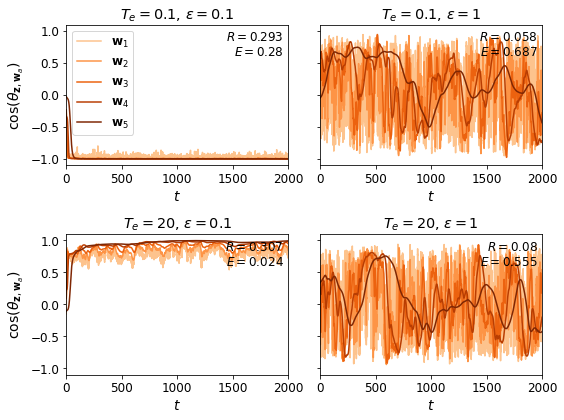

In [36]:
fig11 = plot_wz_align(complex_neuron_for_summary[0])

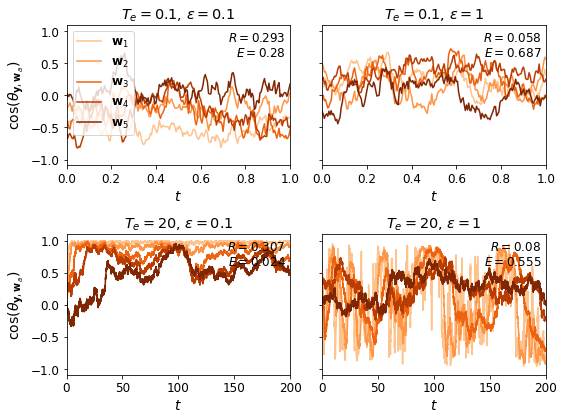

In [37]:
fig12 = plot_wy_align(complex_neuron_for_summary[0], blocks=(0,10))

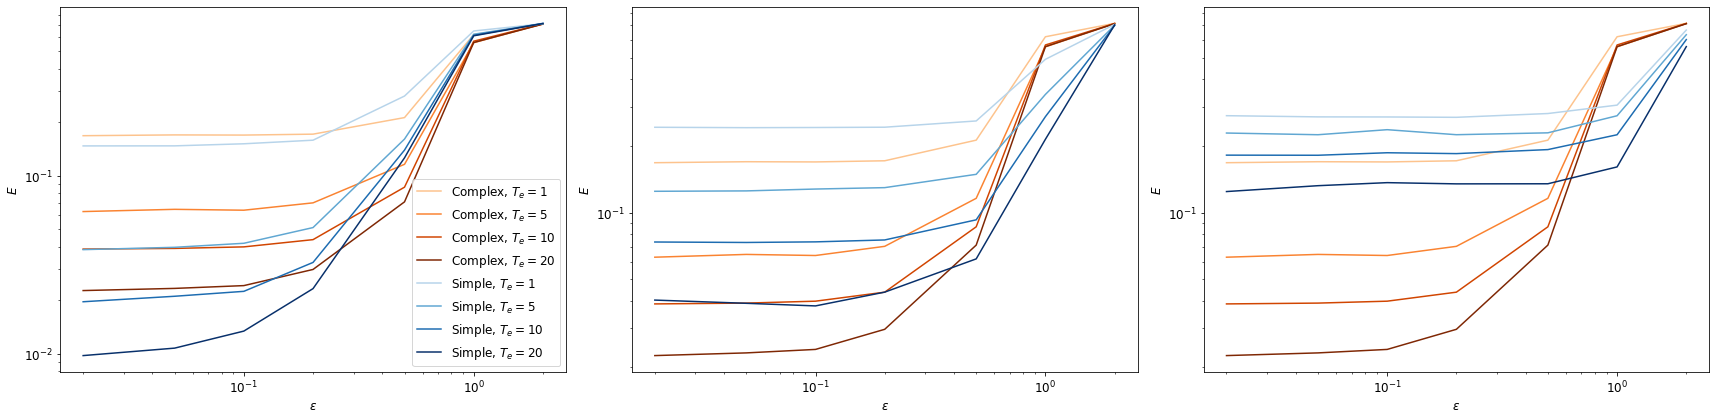

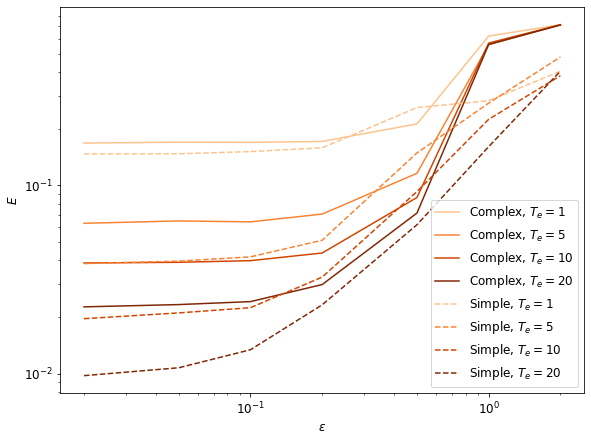

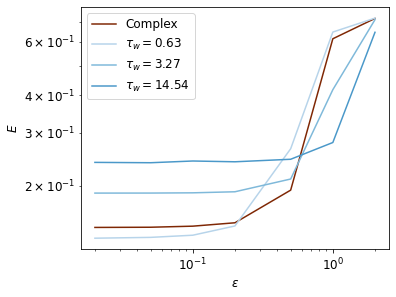

In [29]:
cm_section = np.linspace(0.3, 1, 4)
blues1 = [ cm.Blues(x) for x in cm_section ]
oranges1 = [ cm.Oranges(x) for x in cm_section ]

fig6, axs6 = plt.subplots(1, 3, figsize=(24,6))

for j, neuron in enumerate(simple_neurons_for_summary[:3]):

    for i, T_e in enumerate( [1, 5, 10, 20]):
        plot_E(fig6, axs6[j], complex_neuron_for_summary[0], 'epsilon', color=oranges1[i], label='Complex, $T_e={}$'.format(T_e), T_e=T_e)

    for i, T_e in enumerate( [1, 5, 10, 20]):
        plot_E(fig6, axs6[j], neuron, 'epsilon', color=blues1[i], label='Simple, $T_e={}$'.format(T_e), T_e=T_e)

    axs6[j].set_xscale('log')
    axs6[j].set_yscale('log')

    axs6[j].set_xlabel('$\epsilon$')
    axs6[j].set_ylabel('$E$')

axs6[0].legend()

''''''''''''

fig66, axs66 = plt.subplots(figsize=(8,6))

for i, T_e in enumerate( [1, 5, 10, 20]):
    plot_E(fig66, axs66, complex_neuron_for_summary[0], 'epsilon', color=oranges1[i], label='Complex, $T_e={}$'.format(T_e), T_e=T_e)

for i, T_e in enumerate( [1, 5, 10, 20]):
    plot_E_best(fig66, axs66, simple_neurons_for_summary, 'epsilon', color=oranges1[i], label='Simple, $T_e={}$'.format(T_e), T_e=T_e)

axs66.set_xscale('log')
axs66.set_yscale('log')

axs66.set_xlabel('$\epsilon$')
axs66.set_ylabel('$E$')

axs66.legend()

''''''''''''
cm_section = np.linspace(0.3, 0.9, len(simple_neurons_for_summary))
blues3 = [ cm.Blues(x) for x in cm_section ]
oranges3 = [ cm.Oranges(x) for x in cm_section ]

fig666, axs666 = plt.subplots(figsize=(5,4))
plot_E_average(fig666, axs666, complex_neuron_for_summary[0], 'epsilon', color=oranges1[-1], label='Complex')

for j, neuron in enumerate(simple_neurons_for_summary[:3]):

    plot_E_average(fig666, axs666, neuron, 'epsilon', color=blues3[j])

axs666.set_xscale('log')
axs666.set_yscale('log')

axs666.set_xlabel('$\epsilon$')
axs666.set_ylabel('$E$')

axs666.legend()

### Smoothed block change:
(discontinued)

In [38]:
env_parameters_ou = OrderedDict(
    sigma_s = [1],
    epsilon = [0.02, 0.1, 0.4, 1.6],
    # epsilon = [0.1, 0.4],
    sigma_y = [1],
    T_e = [10, 50, 100, 200],
    # T_e = [50, 100],
    tau_u = [2]
)

envs_for_summary_ou = []
for p in get_combinations(env_parameters_ou):
    envs_for_summary_ou.append(Simulator(p.sigma_s, p.epsilon, p.sigma_y, p.T_e, tau_u=p.tau_u, mode='ou', dt=0.01))

In [39]:
neuron_parameters = OrderedDict(
    N = [10],
    S = [5],
    tau_W=[1],
    beta = [1],
    n = [2]
)

complex_neuron_for_summary = []
for p in get_combinations(neuron_parameters):
    complex_neuron_for_summary.append(Neuron(p.N, p.S, p.tau_W, p.beta, p.n))

In [40]:
simple_neuron_parameters = OrderedDict(
    N = [10],
    S = [1],
    tau_W=[0.63, 3.27, 14.54, 61.17, 295.59],
    beta = [0],
    n = [2]
)

simple_neurons_for_summary = []
for p in get_combinations(simple_neuron_parameters):
    simple_neurons_for_summary.append(Neuron(p.N, p.S, p.tau_W, p.beta, p.n))

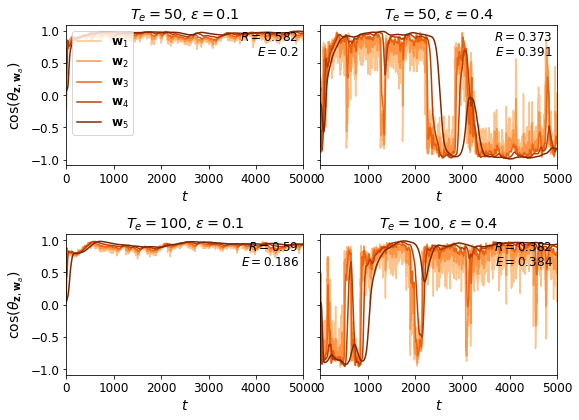

In [36]:
fig21 = plot_wz_align(complex_neuron_for_summary[0])

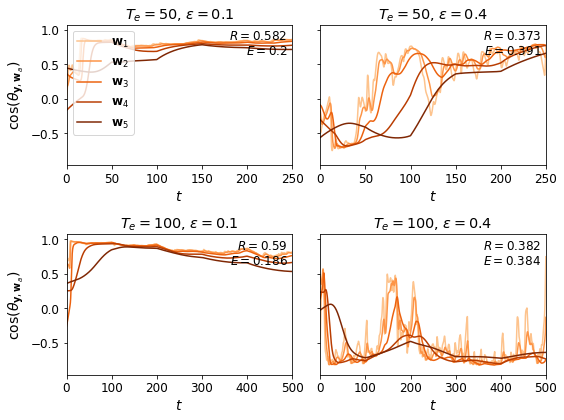

In [37]:
fig22 = plot_wy_align(complex_neuron_for_summary[0], blocks=(0, 5))

In [41]:
trials_complex_summary_ou = OrderedDict(
    neuron = complex_neuron_for_summary,
    env = envs_for_summary_ou
)

T = 5000

# run all the combinations available
for trial in tqdm(get_combinations(trials_complex_summary_ou)):
    trial.env.run(trial.neuron, T=T, summary=True, cutoff=-0.7)

100%|██████████| 16/16 [09:10<00:00, 34.43s/it]


In [42]:
trials_simple_summary_ou = OrderedDict(
    neuron = simple_neurons_for_summary,
    env = envs_for_summary_ou
)

T = 5000

# run all the combinations available
for trial in tqdm(get_combinations(trials_simple_summary_ou)):
    trial.env.run(trial.neuron, T=T, summary=True, cutoff=-0.7)

100%|██████████| 80/80 [41:30<00:00, 31.14s/it]


These are the "smoothed block change" results:

In [44]:
# with open('../data/complex_ou2.pkl', 'wb+') as f:
#     pickle.dump(complex_neuron_for_summary, f)

In [45]:
# with open('../data/simple_ou2.pkl', 'wb+') as f:
#     pickle.dump(simple_neurons_for_summary, f)

In [38]:
# with open('../data/complex_ou2.pkl', 'rb') as f:
#     complex_neuron_for_summary = pickle.load(f)

In [39]:
# with open('../data/simple_ou2.pkl', 'rb') as f:
#     simple_neurons_for_summary = pickle.load(f)

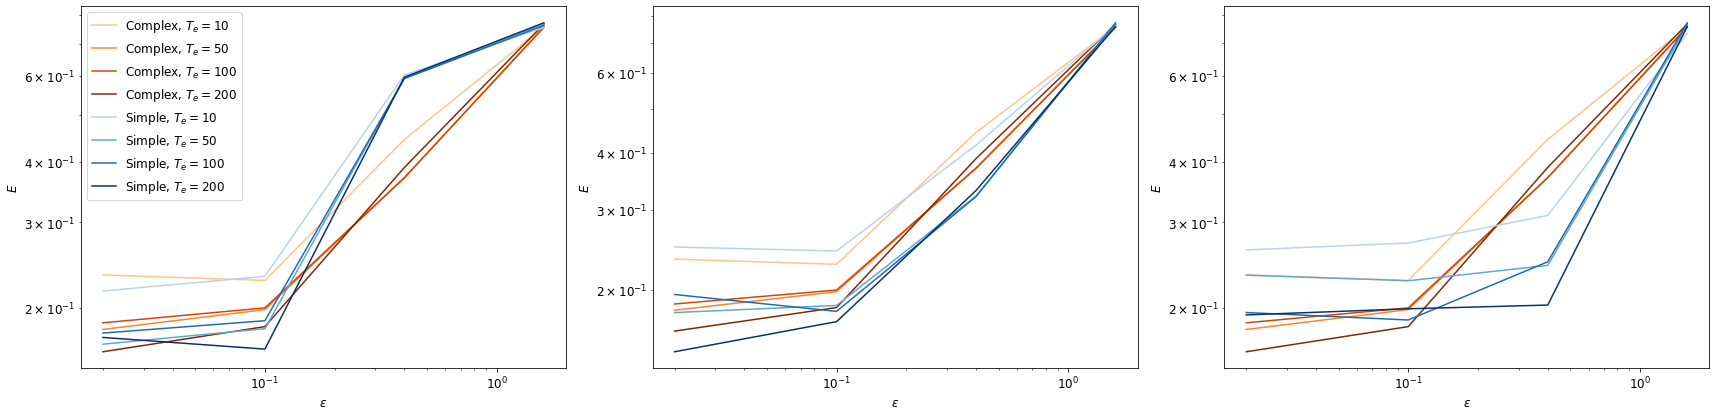

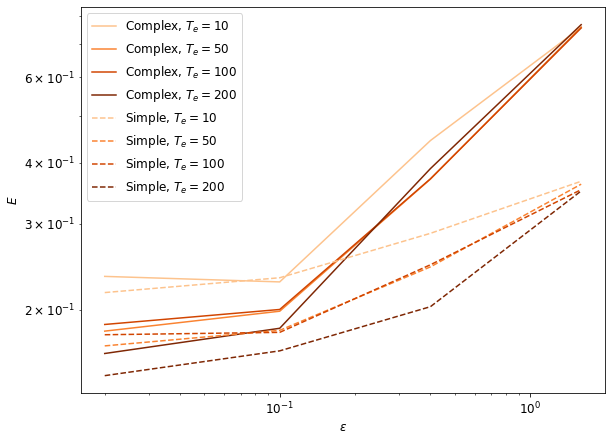

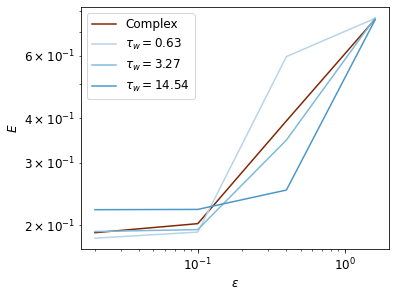

In [43]:
cm_section = np.linspace(0.3, 1, 4)
blues1 = [ cm.Blues(x) for x in cm_section ]
oranges1 = [ cm.Oranges(x) for x in cm_section ]

fig6, axs6 = plt.subplots(1, 3, figsize=(24,6))

for j, neuron in enumerate(simple_neurons_for_summary[:3]):

    for i, T_e in enumerate([10, 50, 100, 200]):
        plot_E(fig6, axs6[j], complex_neuron_for_summary[0], 'epsilon', color=oranges1[i], label='Complex, $T_e={}$'.format(T_e), T_e=T_e)

    for i, T_e in enumerate([10, 50, 100, 200]):
        plot_E(fig6, axs6[j], neuron, 'epsilon', color=blues1[i], label='Simple, $T_e={}$'.format(T_e), T_e=T_e)

    axs6[j].set_xscale('log')
    axs6[j].set_yscale('log')

    axs6[j].set_xlabel('$\epsilon$')
    axs6[j].set_ylabel('$E$')

axs6[0].legend()

''''''''''''

fig66, axs66 = plt.subplots(figsize=(8,6))

for i, T_e in enumerate([10, 50, 100, 200]):
    plot_E(fig66, axs66, complex_neuron_for_summary[0], 'epsilon', color=oranges1[i], label='Complex, $T_e={}$'.format(T_e), T_e=T_e)

for i, T_e in enumerate([10, 50, 100, 200]):
    plot_E_best(fig66, axs66, simple_neurons_for_summary, 'epsilon', color=oranges1[i], label='Simple, $T_e={}$'.format(T_e), T_e=T_e)

axs66.set_xscale('log')
axs66.set_yscale('log')

axs66.set_xlabel('$\epsilon$')
axs66.set_ylabel('$E$')

axs66.legend()

''''''''''''
cm_section = np.linspace(0.3, 0.9, len(simple_neurons_for_summary))
blues3 = [ cm.Blues(x) for x in cm_section ]
oranges3 = [ cm.Oranges(x) for x in cm_section ]

fig666, axs666 = plt.subplots(figsize=(5,4))
plot_E_average(fig666, axs666, complex_neuron_for_summary[0], 'epsilon', color=oranges1[-1], label='Complex')

for j, neuron in enumerate(simple_neurons_for_summary[:3]):

    plot_E_average(fig666, axs666, neuron, 'epsilon', color=blues3[j])

axs666.set_xscale('log')
axs666.set_yscale('log')

axs666.set_xlabel('$\epsilon$')
axs666.set_ylabel('$E$')

axs666.legend()

# Update $\boldsymbol{u}$ less frequently
(discontinued for now)

In [4]:
env_parameters = OrderedDict(
    sigma_s = [1],
    epsilon = [0.02, 0.1, 0.4, 1.6],
    # epsilon = [0.1],
    sigma_y = [2],
    T_e = [10, 50, 100, 200],
    tau_u = [2]
    # T_e = [100]
)

envs_for_summary = []
for p in get_combinations(env_parameters):
    envs_for_summary.append(Simulator(p.sigma_s, p.epsilon, p.sigma_y, p.T_e, tau_u=p.tau_u, dt=0.01))

In [2]:
neuron_parameters = OrderedDict(
    N = [10],
    S = [5],
    tau_W=[1],
    beta = [1],
    n = [2]
)

complex_neuron_for_summary = []
for p in get_combinations(neuron_parameters):
    complex_neuron_for_summary.append(Neuron(p.N, p.S, p.tau_W, p.beta, p.n))

In [3]:
simple_neuron_parameters = OrderedDict(
    N = [10],
    S = [1],
    tau_W=[0.63, 3.27, 14.54, 61.17, 295.59],
    beta = [0],
    n = [2]
)

simple_neurons_for_summary = []
for p in get_combinations(simple_neuron_parameters):
    simple_neurons_for_summary.append(Neuron(p.N, p.S, p.tau_W, p.beta, p.n))

In [5]:
trials_complex_summary = OrderedDict(
    neuron = complex_neuron_for_summary,
    env = envs_for_summary
)

T = 5000

# run all the combinations available
for trial in tqdm(get_combinations(trials_complex_summary)):
    trial.env.run(trial.neuron, T=T, summary=True, cutoff=-0.7)

100%|██████████| 16/16 [06:15<00:00, 23.45s/it]


In [6]:
trials_simple_summary = OrderedDict(
    neuron = simple_neurons_for_summary,
    env = envs_for_summary
)

T = 5000

# run all the combinations available
for trial in tqdm(get_combinations(trials_simple_summary)):
    trial.env.run(trial.neuron, T=T, summary=True, cutoff=-0.7)

100%|██████████| 80/80 [27:31<00:00, 20.65s/it]


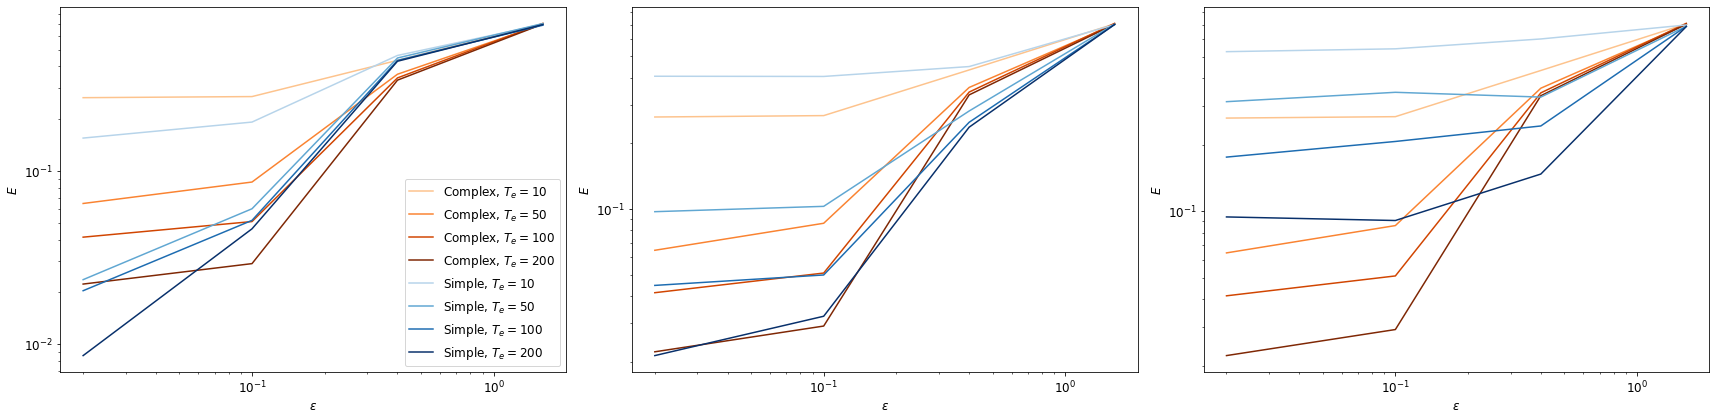

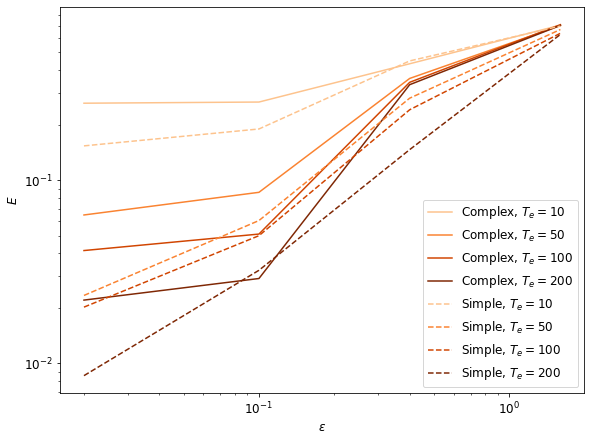

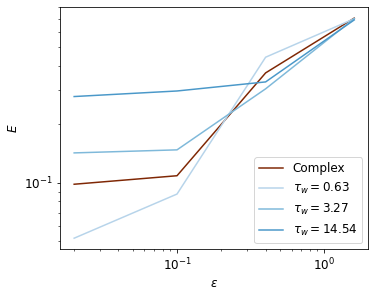

In [10]:
cm_section = np.linspace(0.3, 1, 4)
blues1 = [ cm.Blues(x) for x in cm_section ]
oranges1 = [ cm.Oranges(x) for x in cm_section ]

fig6, axs6 = plt.subplots(1, 3, figsize=(24,6))

for j, neuron in enumerate(simple_neurons_for_summary[:3]):

    for i, T_e in enumerate([10, 50, 100, 200]):
        plot_E(fig6, axs6[j], complex_neuron_for_summary[0], 'epsilon', color=oranges1[i], label='Complex, $T_e={}$'.format(T_e), T_e=T_e)

    for i, T_e in enumerate([10, 50, 100, 200]):
        plot_E(fig6, axs6[j], neuron, 'epsilon', color=blues1[i], label='Simple, $T_e={}$'.format(T_e), T_e=T_e)

    axs6[j].set_xscale('log')
    axs6[j].set_yscale('log')

    axs6[j].set_xlabel('$\epsilon$')
    axs6[j].set_ylabel('$E$')

axs6[0].legend()

''''''''''''

fig66, axs66 = plt.subplots(figsize=(8,6))

for i, T_e in enumerate([10, 50, 100, 200]):
    plot_E(fig66, axs66, complex_neuron_for_summary[0], 'epsilon', color=oranges1[i], label='Complex, $T_e={}$'.format(T_e), T_e=T_e)

for i, T_e in enumerate([10, 50, 100, 200]):
    plot_E_best(fig66, axs66, simple_neurons_for_summary, 'epsilon', color=oranges1[i], label='Simple, $T_e={}$'.format(T_e), T_e=T_e)

axs66.set_xscale('log')
axs66.set_yscale('log')

axs66.set_xlabel('$\epsilon$')
axs66.set_ylabel('$E$')

axs66.legend()

''''''''''''
cm_section = np.linspace(0.3, 0.9, len(simple_neurons_for_summary))
blues3 = [ cm.Blues(x) for x in cm_section ]
oranges3 = [ cm.Oranges(x) for x in cm_section ]

fig666, axs666 = plt.subplots(figsize=(5,4))
plot_E_average(fig666, axs666, complex_neuron_for_summary[0], 'epsilon', color=oranges1[-1], label='Complex')

for j, neuron in enumerate(simple_neurons_for_summary[:3]):

    plot_E_average(fig666, axs666, neuron, 'epsilon', color=blues3[j])

axs666.set_xscale('log')
axs666.set_yscale('log')

axs666.set_xlabel('$\epsilon$')
axs666.set_ylabel('$E$')

axs666.legend()